# Part (a)


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [0]:
def sampler():
  return np.random.uniform(-1,1)

In [0]:
n = 100
D = []
for i in range(n):
  x_i = sampler()
  D.append((x_i,math.sin(3*x_i)))

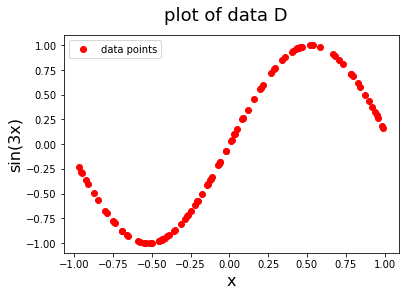

In [5]:
for i in range(n):
  plt.plot(D[i][0],D[i][1],'ro')
  plt.xlabel('x',fontsize='16')
  plt.ylabel('sin(3x)',fontsize='16')
  plt.suptitle('plot of data D',fontsize='18')
  plt.legend(['data points'])
plt.savefig('3a.png')
plt.show()


## Part (b) [Applying Linear Regression using Ordinary Least Mean Square]


In [0]:
x = []
y = []
for i in range(n):
  x.append(D[i][0])
  y.append(D[i][1])


In [9]:
# m is slope and c is the intercept : y = mx + c
# m = sum((x_i - x_mean)(y_i - y_mean))/sum((x_i - x_mean)^2)
# c = y_mean - m*x_mean

x_mean = np.mean(x)
y_mean = np.mean(y)
num = 0
denom = 0
#print(x_mean)
#print(y_mean)
for i in range(n):
  num = num + (x[i]-x_mean)*(y[i] - y_mean)
  denom = denom + (x[i] - x_mean)**2

#learnt line is y = mx+c
m = num/denom
c = y_mean - m*x_mean

#mean square error
#sum((f(x_i) - y[i])**2)/n
mse = 0
for i in range(n):
  mse = mse + ((m*x[i]+c - y[i])**2)
mse = mse/n
print("mean squared error is : ",mse)

mean squared error is :  0.16619557998006695


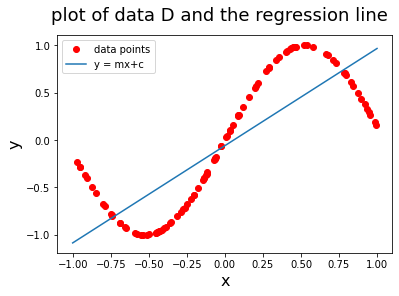

In [12]:
#plotting the line and the data points
x_0 = -1
x_1 = 1
y_0 = m*x_0 + c
y_1 = m*x_1 + c 

plt.plot(x,y,'ro',label='data points')
plt.plot([x_0,x_1],[y_0,y_1],label='y = mx+c')
plt.xlabel('x',fontsize='16')
plt.ylabel('y',fontsize='16')
plt.legend()
plt.suptitle('plot of data D and the regression line',fontsize='18')
plt.savefig('3b.jpg')

##Part (c) : Using Ordinary least mean square


In [0]:
def phi(x,k):
  '''takes parameter x and k, returns list [x^1, x^2, x^3, ..., x^k]'''
  phi_x = []
  for i in range(1,k+1):
    phi_x.append(x**i)
  return phi_x

In [67]:
for k1 in range(1,11):
  for k in range(k1,k1+1):
    X = np.empty((0,k+1),dtype=float)
    for i in range(n):
      #appending a column with entries 1 at the begining
      X = np.vstack((X,np.array([1]+phi(x[i],k))))

  #now, we want W such that Y = XW + b
  #where W = [w1, w2,...,wk].T
  #b = [b1,b2,...,bn]
  #Y = [y1, y2,...,yn]
  # Since we appended a column of all entries 1 to X, we can get rid of b, and W = [b w1 w2 ... wk]
  # Y = XW
  #W is given by least square approximation = inv((X.TX))X.TY
  Y = np.array(y)
  XTX = np.matmul(X.T,X)
  xTxinv = np.linalg.inv(XTX)
  XTY = np.matmul(X.T,Y)
  W = np.matmul(xTxinv,XTY)
  #print(W.shape)
  Y_hat = np.matmul(X,W)
  #print(Y_hat[0])
  #Y_hat.shape
  #print(Y_hat[0])
  #print(y[0])


  #####################
  #plotting for k

  #plotting the line and the data points
  x_0 = -1
  x_1 = 1
  y_0 = m*x_0 + c
  y_1 = m*x_1 + c 

  #plt.plot([x_0,x_1],[y_0,y_1],label='y = mx+c')
  #we have to plot f(x) = W.T*phi(x) + b
  for i in range(n):
    plt.plot(x,Y_hat,'ro',color='green',alpha=0.5)
  plt.plot(x,y,'ro',label='data points',alpha=0.5)


  plt.xlabel('x',fontsize='16')
  plt.ylabel('y',fontsize='16')
  plt.legend()
  plt.suptitle('plot of data D and the regression line',fontsize='18')
  plt.savefig('k_' + str(k1) + '.png')
  plt.clf()
  val = np.sum((Y-Y_hat)**2)/len(Y)
  print('mse for k = ',k1,' is ',val)

mse for k =  1  is  0.16619557998006695
mse for k =  2  is  0.16593250145274183
mse for k =  3  is  0.0026919722377530663
mse for k =  4  is  0.0026866419314772083
mse for k =  5  is  8.00757553022462e-06
mse for k =  6  is  7.813379288929965e-06
mse for k =  7  is  1.013554956475293e-08
mse for k =  8  is  9.574353219383107e-09
mse for k =  9  is  3.925042358373477e-12
mse for k =  10  is  3.653355755097135e-12


<Figure size 432x288 with 0 Axes>

######test cell

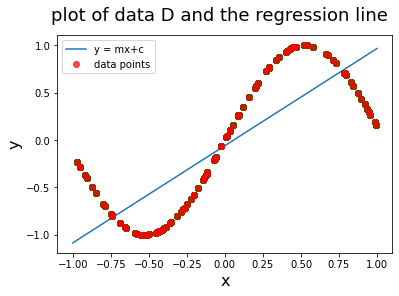

In [64]:

#plotting the line and the data points
x_0 = -1
x_1 = 1
y_0 = m*x_0 + c
y_1 = m*x_1 + c 

plt.plot([x_0,x_1],[y_0,y_1],label='y = mx+c')
#we have to plot f(x) = W.T*phi(x) + b
for i in range(n):
  plt.plot(x,Y_hat,'ro',color='green',alpha=0.7)
plt.plot(x,y,'ro',label='data points',alpha=0.7)

plt.xlabel('x',fontsize='16')
plt.ylabel('y',fontsize='16')
plt.legend()
plt.suptitle('plot of data D and the regression line',fontsize='18')
plt.savefig('k_' + str(i) + '.png')

##Part (d) kernel regression

In [0]:
dx = []
dy = []
for i in range(n):
  dx.append(D[i][0])
  dy.append(D[i][1])

In [0]:
def gaussian_kernel(x1,x2,sigma = 0.05):
  result = -1*((x1-x2)**2)/(2*sigma**2)
  return np.exp(result)

In [0]:
def polynomial_kernel(x1,x2,b=1,degree=2):
  return ((b+x1*x2)**degree)

###testing mse with gaussian kernel , with sigma ranging from 0.001 to 1

mse (train = 7.186776580153576e-08 )
mse (test =  0.000673851615760893  )

In [85]:
sig = 0.002
mse_old = 1.0
while sig < 1.0:
  y_pred_train = []
  for i in range(n):
    ans1 = 0.0
    ans2 = 0.0
    for j in range(n):
      ans1 += gaussian_kernel(dx[i],dx[j],sig)*dy[j]
      ans2 += gaussian_kernel(dx[i],dx[j],sig)
    y_pred_train.append(ans1/ans2)

  mse = 0.0
  for i in range(n):
    mse = mse + (y_pred_train[i] - dy[i])**2
  mse = mse/n
  print('mean square error for gaussian kernel and sigma = ',sig,' is ',mse)
  if mse < mse_old:
    mse_old = mse
    sig_opt = sig
  sig = sig + 0.01
print('best mse is found to be ',mse_old,' at sigma : ',sig_opt)

dx_test = []
dy_test = []
for i in range(n):
    dx_test.append(np.random.uniform(-1,1))
    dy_test.append(math.sin(3*dx_test[i]))

print('running on test data')
y_pred_test = []
for i in range(n):
  ans1 = 0.0
  ans2 = 0.0
  for j in range(n):
    ans1 += gaussian_kernel(dx_test[i],dx[j],sig_opt)*dy[j]
    ans2 += gaussian_kernel(dx_test[i],dx[j],sig_opt)
  y_pred_test.append(ans1/ans2)

mse = 0.0
for i in range(n):
  mse = mse + (y_pred_test[i] - dy_test[i])**2
mse = mse/n
print('mean square error for test data and sigma = ',sig_opt,' is ',mse)



mean square error for gaussian kernel and sigma =  0.002  is  4.787818106898422e-07
mean square error for gaussian kernel and sigma =  0.012  is  5.553890257438831e-05
mean square error for gaussian kernel and sigma =  0.022  is  0.00010353898788523859
mean square error for gaussian kernel and sigma =  0.032  is  0.00018551577274431464
mean square error for gaussian kernel and sigma =  0.042  is  0.0003259909397033588
mean square error for gaussian kernel and sigma =  0.052000000000000005  is  0.0005241310800342682
mean square error for gaussian kernel and sigma =  0.062000000000000006  is  0.0008175452752269581
mean square error for gaussian kernel and sigma =  0.07200000000000001  is  0.0012475571044637142
mean square error for gaussian kernel and sigma =  0.082  is  0.0018365132896185213
mean square error for gaussian kernel and sigma =  0.092  is  0.0025879682968355834
mean square error for gaussian kernel and sigma =  0.102  is  0.003496373953761224
mean square error for gaussian 

###plot to show that it needs regularization

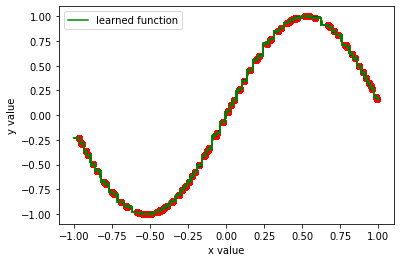

In [87]:
x_tst = np.linspace(-1,1,1000)
y_tst = []
for i in range(1000):
  ans1 = 0.0
  ans2 = 0.0
  for j in range(n):
    ans1 += gaussian_kernel(dx[j],x_tst[i],sig_opt)*dy[j]
    ans2 += gaussian_kernel(dx[j],x_tst[i],sig_opt)
  y_tst.append(ans1/ans2)


for i in range(n):
  plt.scatter(dx,dy,color = 'red')
  plt.plot(x_tst,y_tst,color='green')
plt.legend(['learned function'])
plt.xlabel('x value')
plt.ylabel('y value')
plt.savefig('3d.png')